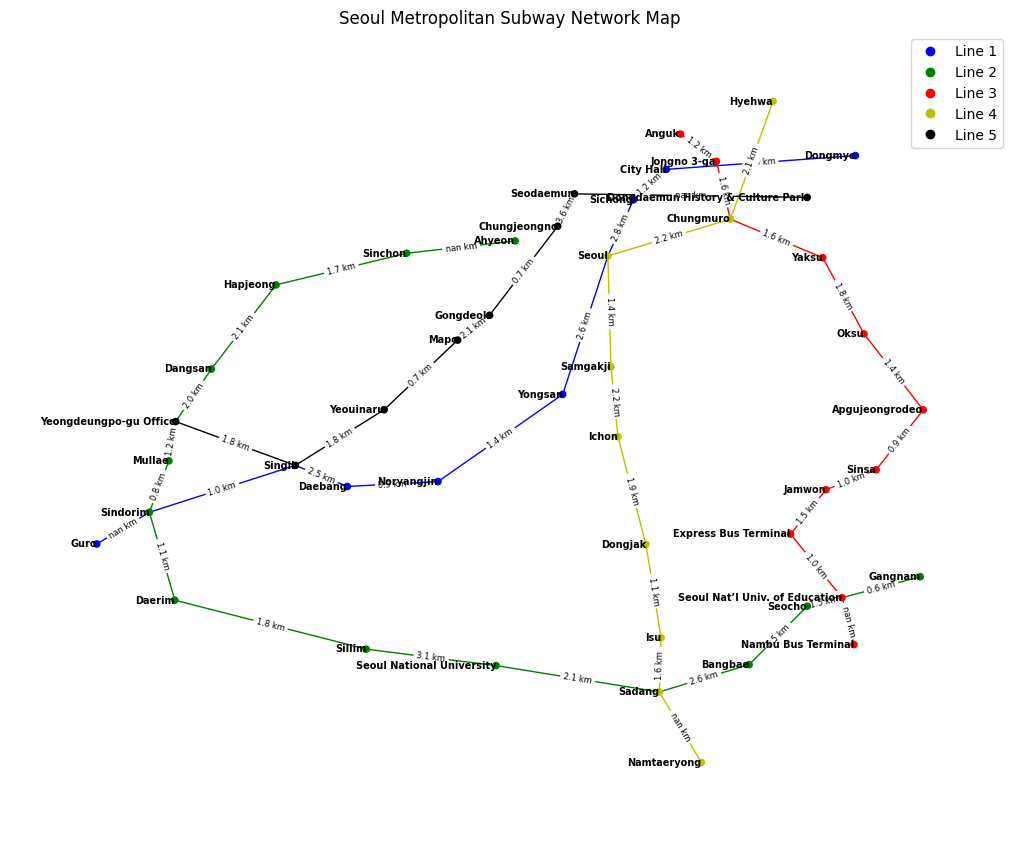

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the Seoul Subway Station dataset from a CSV file into a pandas DataFrame
Network = pd.read_csv('Seoul Subway Stations.csv')

# Create an empty graph using NetworkX to represent the subway network
MyGraph = nx.Graph()

# Add subway stations as nodes to the graph
for _, row in Network.iterrows():
    station = row['Station']
    latitude = row['Latitude']
    longitude = row['Longitude']
    line = row['Line']
    distance = row['Distance']
    MyGraph.add_node(
        station,
        pos=(longitude, latitude),
        line=line,
        latitude=latitude,
        longitude=longitude,
        distance=distance
    )

# Create edges between stations with distances from the CSV file
for line, line_data in Network.groupby('Line'):
    stations = line_data['Station'].tolist()
    distances = line_data['Distance'].tolist()
    for i in range(len(stations) - 1):
        station1 = stations[i]
        station2 = stations[i + 1]
        distance = distances[i + 1] if i + 1 < len(distances) else 0
        MyGraph.add_edge(station1, station2, line=line, distance=distance)

# Define colors for subway lines
line_colors = ['b', 'g', 'r', 'y', 'k']
line_to_color = {line: color for line, color in zip(Network['Line'].unique(), line_colors)}

# Assign edge and node colors based on subway lines
edge_colors = [line_to_color[MyGraph.edges[edge]['line']] for edge in MyGraph.edges]
node_colors = [line_to_color[MyGraph.nodes[node]['line']] for node in MyGraph.nodes]

# Get positions of nodes for plotting
pos = nx.get_node_attributes(MyGraph, 'pos')

# Set the figure size
plt.figure(figsize=(10, 8))

# Draw nodes, edges, and labels with colors and attributes
nx.draw(
    MyGraph,
    pos,
    node_color=node_colors,
    node_size=20,
    edge_color=edge_colors,
    with_labels=False  # We'll add labels separately
)

# Draw station labels without outline and original positioning
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=7, fontweight='bold', ha='right', va='center')

# Display edge distances between stations in km
edge_labels = {(u, v): f"{MyGraph.edges[(u, v)]['distance']:.1f} km" for u, v in MyGraph.edges}
nx.draw_networkx_edge_labels(MyGraph, pos, edge_labels=edge_labels, font_size=6)

# Create a legend to describe the lines of the graph
for line in Network['Line'].unique():
    color = line_to_color[line]
    plt.plot([], [], marker='o', color=color, label=line, linestyle='')

# Display the legend showing subway lines with represented colors
plt.legend()

# Plot the title and the subway network
plt.title('Seoul Metropolitan Subway Network Map')
plt.show()


